# **Part B: Data Acquisition**

## **Importing the modules**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import requests

5. Import datasets from different sources: 

• Load CSV file using Pandas. 

• Parse a JSON file. 

• Connect to a SQL table and fetch records. 

• Fetch data from an API (e.g., random user API or dummy REST API).

In [4]:
# Fetch the data from csv file
csv_data = pd.read_csv("customers.csv")

In [5]:
# Fetch the data from json file
jason_data = pd.read_json("customers.json")

In [6]:
# Fetch the data from sql database
conn = sqlite3.connect("customers.db")

In [7]:
# Fetch the data from and API
# api_url = "https://randomuser.me/api/?results=10"
# response = requests.get(api_url)
# api_json = response.json()
# api_df = pd.json_normalize(api_json["results"])

movie_name = input("Enter the movie name: ").title()
release_year = int(input("Enter the relaese year: "))
plot_size = input("Enter the plot size (short or full): ").lower()
API = f"http://www.omdbapi.com/?i=tt3896198&apikey=7e020804&t={movie_name}&y={release_year}&plot={plot_size}"
response = requests.get(API)
movie_data = response.json()
movie_df = pd.json_normalize(movie_data)
movie_df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,Avengers: Infinity War,2018,PG-13,27 Apr 2018,149 min,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely, Stan Lee","Robert Downey Jr., Chris Hemsworth, Mark Ruffalo",The Avengers and their allies must be willing ...,...,68,8.4,"1,321,746",tt4154756,movie,N/A,"$678,815,482",N/A,N/A,True


- **Part C: Data Understanding & Cleaning**

- 6. Perform initial exploration: 

• Use head(), info(), describe() to explore. 

• Identify missing values and duplicates.

- 7. Apply data cleaning: 

• Handle missing data (imputation or removal). 

• Correct inconsistent data types. 

• Drop irrelevant columns

In [8]:
# Using head(), info(), describe() functions
print(csv_data.head())
print("\n-----------------------------------------\n")
print(csv_data.info())
print("\n-----------------------------------------\n")
print(csv_data.describe())
print("\n-----------------------------------------\n")

# Missing values and duplicates
print("\nMissing values in each column:\n", csv_data.isnull().sum())
print("\n-----------------------------------------\n")
print("\nNumber of duplicate rows:", csv_data.duplicated().sum())

   CustomerID  Age  Gender  Income  Purchases  Complaints  Churn
0           1   56    Male   65648         15           0      1
1           2   69    Male   29516         19           0      0
2           3   46    Male   22396          7           0      0
3           4   32  Female  104082         28           0      0
4           5   60    Male   39129         43           0      0

-----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  1000 non-null   int64 
 1   Age         1000 non-null   int64 
 2   Gender      1000 non-null   object
 3   Income      1000 non-null   int64 
 4   Purchases   1000 non-null   int64 
 5   Complaints  1000 non-null   int64 
 6   Churn       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None

-----------------------------------------

 

In [9]:
# Handeling missing data(imputation and removal)
csv_data["Age"] = csv_data["Age"].fillna(csv_data["Age"].mode()[0])
csv_data["Income"] = csv_data["Income"].fillna(csv_data["Income"].mode()[0])
csv_data["Purchases"] = csv_data["Purchases"].fillna(csv_data["Purchases"].mode()[0])

# Correct inconsistent data types
csv_data["Age"] = csv_data["Age"].astype(int)
csv_data["Income"] = csv_data["Income"].astype(int)
csv_data["Purchases"] = csv_data["Purchases"].astype(int)

# Drop irrelevant columns
csv_data = csv_data.drop(columns=["CustomerID"])
print("\nData after cleaning:\n", csv_data.head())


Data after cleaning:
    Age  Gender  Income  Purchases  Complaints  Churn
0   56    Male   65648         15           0      1
1   69    Male   29516         19           0      0
2   46    Male   22396          7           0      0
3   32  Female  104082         28           0      0
4   60    Male   39129         43           0      0


- **Part D: Exploratory Data Analysis (EDA)**

- 8. Perform Univariate Analysis: 

• Distribution plots of Age, Income, and Purchases.

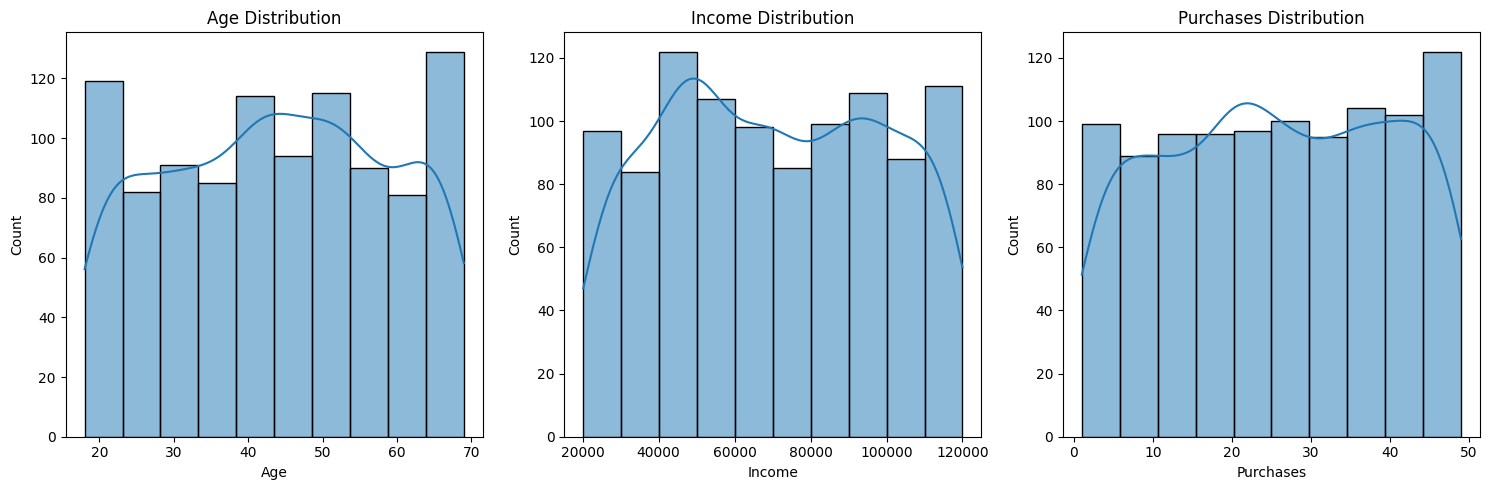

In [10]:
# Distribution of plots of age, income, and purchases
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(csv_data["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.subplot(1, 3, 2)
sns.histplot(csv_data["Income"], bins=10, kde=True)
plt.title("Income Distribution")
plt.subplot(1, 3, 3)
sns.histplot(csv_data["Purchases"], bins=10, kde=True)
plt.title("Purchases Distribution")
plt.tight_layout()
plt.show()

- 9. Perform Bivariate Analysis: 

• Relationship between Gender & Purchases. 

• Relationship between Income & Churn.

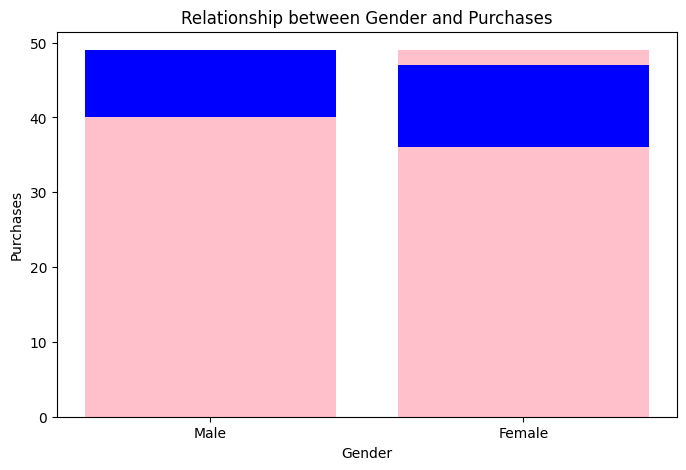

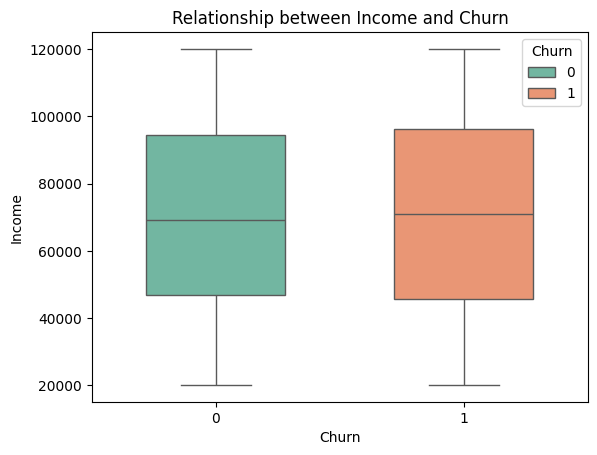

In [11]:
# Relationship between Gender and Purchases
plt.figure(figsize=(8, 5))
plt.bar(x=csv_data["Gender"], height=csv_data["Purchases"], color=['blue', 'pink'])
plt.title("Relationship between Gender and Purchases")
plt.xlabel("Gender")
plt.ylabel("Purchases")
plt.show()

# Relationship between Income and Churn
sns.boxplot(data=csv_data, x="Churn", y="Income", gap=0.3, hue="Churn", palette="Set2")
plt.title("Relationship between Income and Churn")
plt.xlabel("Churn")
plt.ylabel("Income")
plt.show()

- 10. Perform Multivariate Analysis: 

• Correlation heatmap of all numerical variables. 

• Pair plots to identify feature interactions.

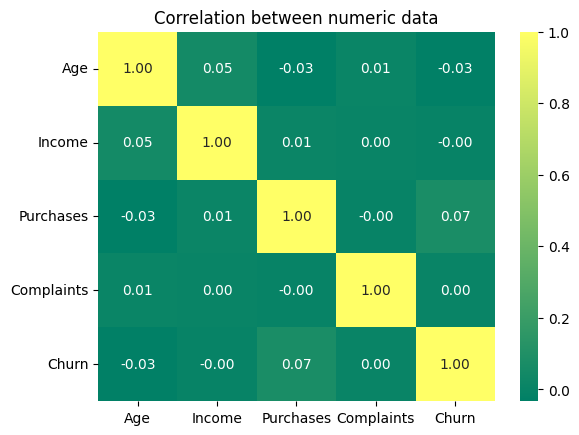

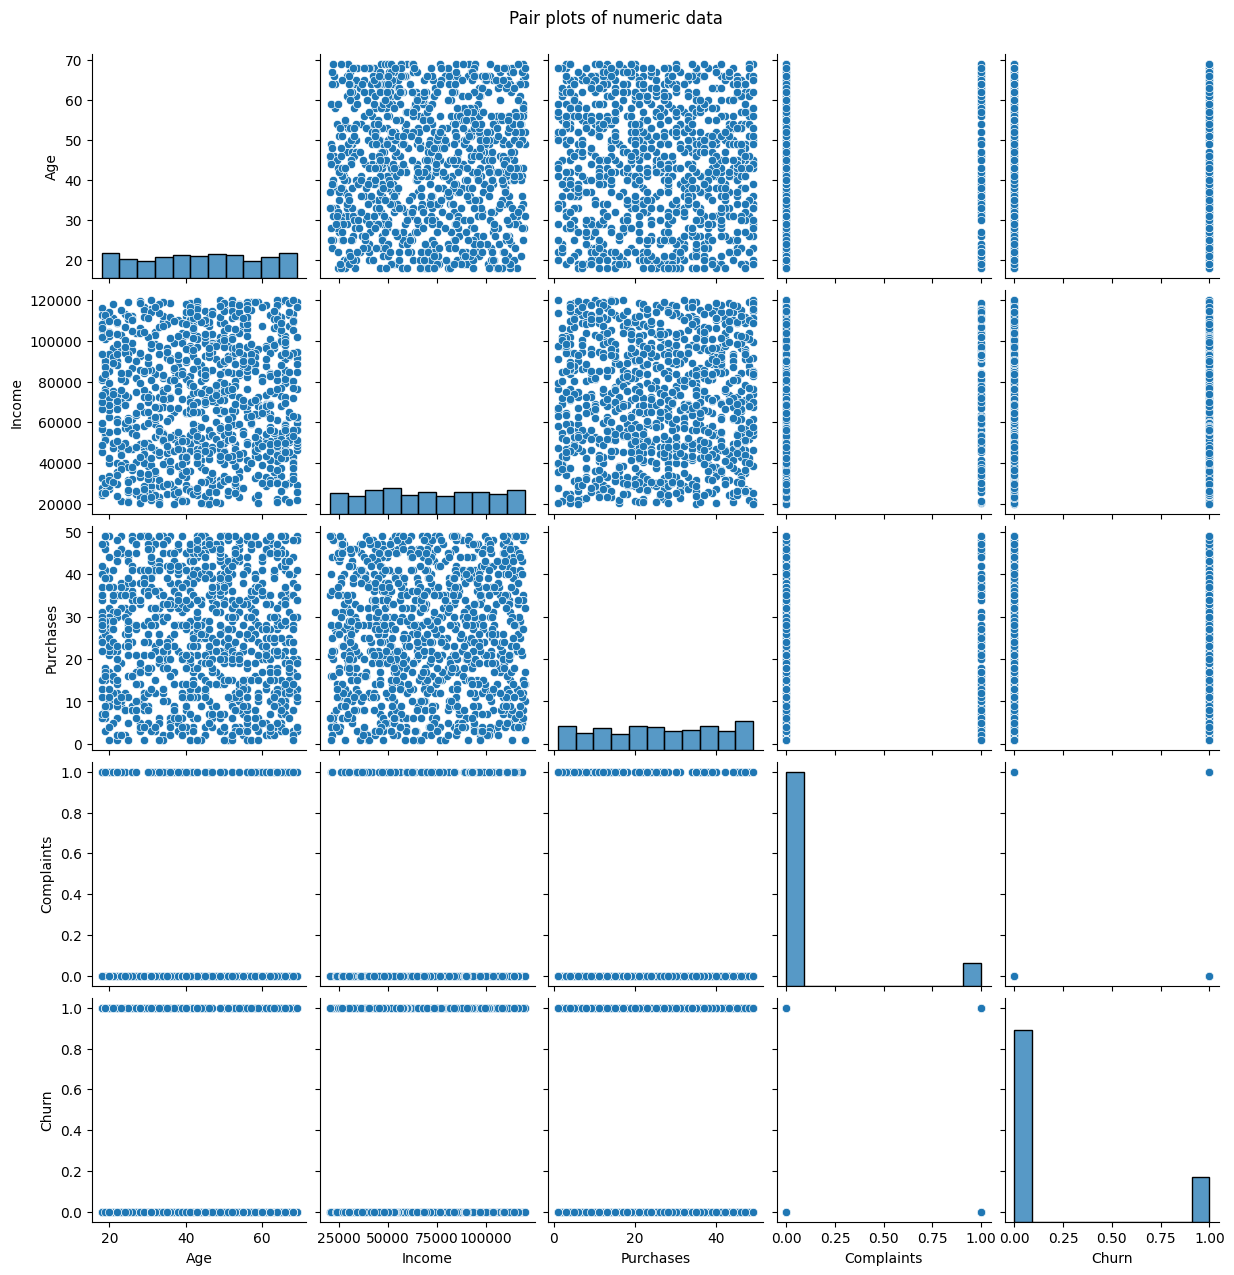

In [12]:
# Selectimg numerical columns from csv data
numeric_data = csv_data.select_dtypes(include="number")
corr = numeric_data.corr()

sns.heatmap(corr, annot=True, cmap="summer", fmt=".2f") 
plt.title("Correlation between numeric data")
plt.show()

# Pair plots to identify feature interactions
sns.pairplot(numeric_data)
plt.suptitle("Pair plots of numeric data", y=1.02)
plt.show()